
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/la-conga-machinelearning/la-conga-machinelearning-student/-/raw/main/imgs/banner_DA.png"  width="1000px" height="250px">



# <center> **05. Fundamentals of Deep Learning: towards gradient descent** </center>



## **Outline**

1. **Regression from scratch: a linear approximation**
2. **Gradient descent method: An Iterative approach**
3. **Gradient descent for classification**




In [ ]:
#@title **Execute this cell**
#@markdown Please include your student id
import sys
import inspect

group_id = "ML-20221-Laconga" #@param {type:"string"}
assignment_id = group_id +'.machine_learning'
student_id = "2218109" #@param {type:"string"}
"""
Put your student ID here

Example: student_id =  '2152145'
""" 

"\nPut your student ID here\n\nExample: student_id =  '2152145'\n"

In [ ]:
#@title **Execute this cell**
#@markdown **UTILS**
#@markdown Please dont modify any line in this cell

import os
import json
import requests
from collections import namedtuple


Config = namedtuple('Config', ['server_name'])
config = Config(server_name='https://bivlabgrader.azurewebsites.net/api')


def check_solution_and_evaluate(assignment_id: str, student_func_str: str):

    # Set the endpoint and payload.
    payload = {
        'func_str': student_func_str,
        'assignment_id': assignment_id,
        'student_id': student_id
    }
    endpoint_url = config.server_name + '/CheckAndEvaluateSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.post(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def pprint_json_response(response, indent=0):
    """Pretty print the response."""
    for key, value in response.items():
        print('\t' * indent + str(key.capitalize()))

        # If dictionary, do a recurrent call.
        if isinstance(value, dict):
            pprint_json_response(value, indent + 1)
        else:
            # Enumerate elements if list.
            if isinstance(value, list):
                if len(value) == 1:
                    print('\t' * (indent + 1) + str(value[0]))
                else:
                    for i, e in enumerate(value, start=1):
                        print('\t' * (indent + 1) + f'{i}. {e}')
            else:
                print('\t' * (indent + 1) + str(value))

In [ ]:
#@title 1. MONTAR EL DRIVE  (If you are in in colab){ display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/course-IA2/la-conga-machinelearning-studen')
print(os.getcwd())

# **1. Regression from scratch: a linear approximation**


The **most sucesful** thecnique nowadays is based on the most simple classifier: **the linear classifier!**. The basic idea is to split classes by a linear boundary with dimensions according to the features of the problem. 

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/img0.png"/>



- In this supervised problem, it should be predicted a **continuous value** based on a set of **training data**. 
- Then, we need to fit a function $f(x)$ to represent the regresion from training data $\mathbf{X}$
  - **Fit** means find the **best** parameters that adjust the function $f(x) = \{\omega_1, \omega_2, \ldots, \omega_n\}$

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">


- Which is the **simplest** function to fit training data ?
- Which are the parameters for the **simplest** function ?





/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0, 0.5, 'Temperature (T)')

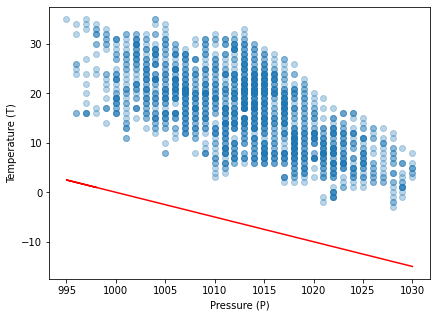

In [ ]:
#@title  **How to define best parameters ?**
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

init_data =  2000#@param {type:"integer"}
end_data =  4000#@param {type:"integer"}
y = "TEMP" #@param {type:"string"}
x_1 = "PRES" #@param {type:"string"}
x_2 = "Ir" #@param {type:"string"}
#PM2.5 consists of airborne particles with aerodynamic diameters of less than 2.5 μm.
#They are known to influence visibility, human health and even climate 



w_0 = 500 #@param {type:"number"}
w_1 = -0.5#@param {type:"number"}
 
data = pd.read_csv('data/PRSA_data_class_1.csv',error_bad_lines=False)
X = data[[x_1, x_2]].values[init_data:end_data,:]
Y = data[y].values[init_data:end_data]

y_est=w_0 +w_1*X[:, 0]

fig = plt.figure(figsize=(15,5))
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1)
# plot a scatters points

ax.scatter(X[:, 0], Y, alpha=0.3)
ax.plot(X[:, 0] , y_est, c="red")
ax.set_xlabel('Pressure (P)')
ax.set_ylabel('Temperature (T)')



# **2. Regression as linear regression**




- How to define **best** parameters ?

  - We have available $n$ **training** samples, where each $i$ sample is a tuple: $(x^{i}, y^{i})$ 
  - We need to evaluate the function $f_{\omega}(x) = \{\omega_0,\omega_1, \ldots \}$ that minimize **the error**, so: 

  - we assume that regression could be represented by $f_{\omega}(x) = \omega_0 +\omega_1 x$. **THE HIPOTHESIS**
  
  - the parameters to **LEARN** are $\{\omega_0,\omega_1\}$

  - the cost function is the error $ J(\omega) = \mathbf{e}(Y_{\omega}(x) - \mathbf{Y})$

  - ###### **GOAL is TO MINIMIZE ($J(\omega)$): $\underset{\omega_0, \omega_1}{min} (E)$**  


#### **Last squares**

<center><img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/mse_grafica.png" width="300"></center>



Then, the goal is to define an error function $J(\omega)$ that can be expressed mathematically as  the **mean square error (MSE)**  as: $J(\omega) = \frac{1}{n}\sum_{i}^{n}( \underset{\mathbf{e}}{\underbrace{y^{i} -\hat{y}_{\omega}(x^{i})}} )^{2}$, matricially:

 $$J(\omega) = \frac{1}{n}\mathbf{e}^{T}\mathbf{e}$$

where $\hat{y}_{\omega}(x^{i})$ is prediction on $x^{i}$ point with parameters $\omega$ and the  $y^{i}$ the corresponding training value ($x^{i}, y^{i} $) and the linear model is: $\hat{y}_{\omega}(x^{i}) = \omega_0 + \omega_1 x^{i}$. The simplest way to solve this problem come  from **closed solutions**. From matricial notation, the cost function, can be defined as: 
$$
\begin{matrix}
 J(\omega)  = &\frac{1}{n}(Y-XW)^T (Y-XW)\\ 
            = &\frac{1}{n}(Y^T-W^{T}X^{T}) (Y-XW)\\
            = &\frac{1}{n}(Y^T Y - Y^T XW - W^T X^T Y + W^T X^T XW)\\
            = &\frac{1}{n}(Y^T Y - 2 W^T X^T Y + W^T X^T XW) **
\end{matrix}
$$

** $Y^T XW = W^T X^T Y $ because is a matrix $1 \times 1$

Now, we can derivate $J(\omega)$ w.r.t $\omega$, as 

$$
\begin{matrix}
 \nabla J(\omega) & = \frac{1}{n}(\nabla Y^T Y - 2 \nabla W^T X^T Y + \nabla W^T X^T XW)\\
                 & = \frac{1}{n}(0 - 2 X^T Y + 2 X^T XW) *** \\
                 & = \frac{2}{n}(\underbrace{ X^T XW- X^T Y }) \\
\end{matrix}
$$

[*** Rule to derivate tranpose](http://www.gatsby.ucl.ac.uk/teaching/courses/sntn/sntn-2017/resources/Matrix_derivatives_cribsheet.pdf). To find optimum $W$, the equation $X^T XW- X^T Y =0$. Solving, 

 $$\hat{W} = (X^TX)^{-1} X^T Y$$

**Make predictions:** $\hat{Y} = X\hat{W}$ 



<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

Now, you can the opportunity to implement this **close solution** for the dataset [**Beijing PM2.5**](https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data)

- $(\mathbf{\hat{Y}})$ is the Temperature
- $(\mathbf{\hat{X}})$ is the Pression


0. Load dataset, show in a header and get $(\mathbf{X}, \mathbf{Y})$




In [ ]:
#@title Dataframe Beijin PM2.5
# select variable of interest and reshape for matrix operation
X = data['PRES'].values[2000:3000]
# select variable to predict
Y = data['TEMP'].values[2000:3000]

print("X: ", X.shape, "Y: ", Y.shape)
print(data.shape)
data.head()

X:  (1000,) Y:  (1000,)
(43824, 13)


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


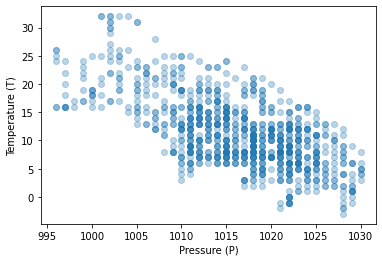

In [ ]:
#@title Plot (X,Y)
plt.scatter(X,Y, alpha = 0.3);
plt.xlabel('Pressure (P)');
plt.ylabel('Temperature (T)');

Arrange $\mathbf{X}$ by adding a ones column ($x_0$) that support $\omega_0$ operation

In [ ]:
#@title **code student**


(1000, 3)

Compute $W = (X^TX)^{-1} X^T Y$ using matricial numpy operations

In [ ]:
#@title **code student**



Compute $\hat{Y} = XW$ 

In [ ]:
#@title **code student**



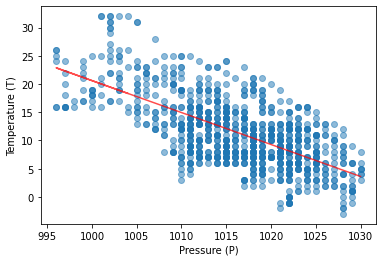

In [ ]:
#@title Plot close solution
plt.scatter(X_ad[:,1],Y, alpha=0.5);
plt.plot(X_ad[:,1],predictedY, 'red', alpha=0.7);
plt.xlabel('Pressure (P)');
plt.ylabel('Temperature (T)');

**In summary**, linear regression assumes between a dependent variable ($y$) and independent variables ($x$). For a single input variable  ($x_1$), while for multiple input variables is a  **multiple linear regression** (until $x_i$), described as: 

$$y = \omega_0 + \omega_1 x_1 + \dots + \omega_i x_i + \epsilon$$

Where  $\omega_1$ is scale factor and $\omega_0$  indicates the intercept. Also, the $\epsilon$ parameter indicates the error (namely assumed as Gaussian distribution $(G(\mu=0, \sigma=1)$). The following graphs show the relationship of temperature to pressure and rainfall accumulated in Beijing.

/usr/local/lib/python3.7/dist-packages/IPython/utils/py3compat.py:186: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(compiler(f.read(), fname, 'exec'), glob, loc)


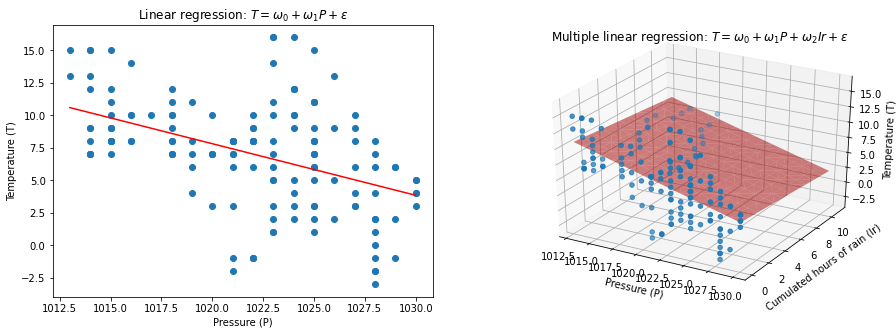

<Figure size 432x288 with 0 Axes>

In [ ]:
#@title **Linear regression plots** { display-mode: "form" }
%run -i 'notes/plot_class_1_1.py'

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Run a regression example using **BOSTON DATASET**`from sklearn.datasets import load_boston`. y = target and X= 5 feature and with any other

- What happened with multivariable problems? It is fast or slow?

# **Some partial Conclusions!**
This type of solution has strong limitations such as: 
* High complexity in environments with large amounts of observations. 
* Restrictions on the calculation of the inverse matrix (singularity)

***What happens when it is not possible to solve the problem with closed formulation?***

# **3. Gradient descent method: An Iterative approach**


# $$\omega := \omega - \alpha\nabla J(\omega)$$


#### _**Gradient Descent is the process of minimizing a cost function by following  gradient steps along the cost $J$ function**_


<center><img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/gradientdescent_intuition.gif" width="400"></center>

- We need to know the derivative of cost function (step of algorithm)
- The estimation moves in "direction of gradient"
- $\omega$ values are updated, minimizing the error (loss) of a model on our training data, according to: 

$$\omega := \omega - \alpha\nabla J(\omega)$$

- 

The parameter $\alpha$ is the **learning rate** (step-size). The influence of  $\alpha$ is illustrated in next picture: 

<center><img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/gradientdescent.gif" width="500"></center>

So, the method can be summarized in the following steps:

**Gradient descent method:**
1. Initialize the coefficients $\omega$
2. Calculating the gradient $\nabla J(\omega)$
3. Updating the coefficients $\omega_{t} := \omega_{t-1} - \alpha\nabla J(\omega_{t-1})$
4. Calculate error tolerance to stop the algorithm $e = \omega_{t}-\omega_{t-1} > tolerance$

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Now that you know $J(\omega)$ and $\nabla J(\omega)$ **implement gradient descent using loops for training samples**
- Drawn resulting line and minimization function


**POINT-WISE IMPLEMENTATION**

(1000, 1) (1000, 1)


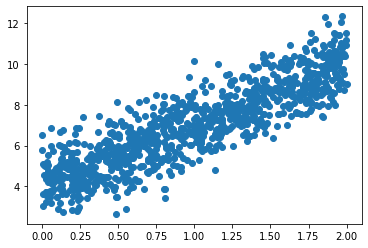

In [ ]:
#@title **code** load simulated data: W1=4, W1=3

w_0 = 4 #@param {type:"number"}
w_1 = 3#@param {type:"number"}
Totalsamples = 1000#@param {type:"number"}
np.random.seed(0)

X = 2 * np.random.rand(Totalsamples,1)
y = w_0 + w_1 * X+np.random.randn(Totalsamples,1)

plt.scatter(X, y);
print(X.shape, y.shape)


## 1. **Define cost function:** $J(\omega) = \frac{1}{n}\sum_{i}^{n}( y^{i} -\hat{y}_{\omega}(x^{i}) )^{2}$





In [ ]:
#@title **code student** 
#@markdown point wise cost_fun_ew
def MSE_loss_function(w_0, w_1, X, Y):
    


    
    return J

print(X.shape, y.shape)

(1000, 1) (1000, 1)
[0.]
[0.25]
0.2701351351351353
[37424.4105286]


## **2. Define gradient of cost function:** $\nabla J(\omega)$. 

Remember and proof general equations: 

$$J(w)=\frac{1}{n} \sum_{i=n}(f_w (x_i)-y_i)^2$$
$$f_w (x_i) =w_0 + w_1 x_i $$
$$\frac{\partial J}{\partial w_0}=\frac{2}{n}\sum_{i=n}(f_w(x_i)-y_i)$$
 $$\frac{\partial J}{\partial w_1}=\frac{2}{n}\sum_{i=n}(f_w(x_i)-y_i)x_i$$ 


In [ ]:
#@title **code student** 
def compute_MSE_gradients(w_0, w_1, X, Y):


  return grad0, grad1

print(X.shape, y.shape)
print(cost_grad_ew(0, 1, np.ones(X.shape), np.ones(y.shape)))
print(cost_grad_ew(0, 0.5, np.ones(X.shape), np.ones(y.shape)))
print(cost_grad_ew(0, 0.1, np.linspace(0, 1, num=1000), np.linspace(0, 1, num=1000)))
print(cost_grad_ew(200, 0.5, X, y))

# **3. Implement gradient descent approach:** $\omega := \omega - \alpha\nabla J(\omega)$ from a element-wise perspective


In [ ]:
#@title **code student** def descenso_gradiente
def compute_MSE_gradient_descent(X, Y, w_0, w_1, alpha, batch):
  #Please copy the implementation of your latest functions inside here
  #(MSE_loss_function and compute_MSE_gradients)
  def MSE_loss_function(w_0, w_1, X, Y):
      ...
      return error / (X.shape[0])

  def compute_MSE_gradients(w_0, w_1, X, Y):
      ...
      return grad0, grad1
      
  hist_coste = []
  for i in range(batch):
    cost_i = 
    hist_coste.append(      )
    w_0_grad, w_1_grad =
    w_0 = 
    w_1 = 
    cost_ip = 
    
    if (cost_i-cost_ip).all() < 1e-08 :
      #print("batch_i: ", i, "tolerance is satisfied: ", cost_i-cost_ip, "cost: ", cost_ip)
      break
    #print("batch: ", i, "error: " , (cost_i-cost_ip ))

  print("batch: ", i, "cost: ", MSE_loss_function(w_0, w_1, X, Y))
  return w_0, w_1, hist_coste

print(X.shape, y.shape)
w_0,w_1, hist_coste = compute_MSE_gradient_descent(X, y, 1, -1, 0.1, 500)
w_0,w_1    

**Batch** is each step of gradient descent that use all samples of training


- Use the artifitial dataset `make_regression`  to test your code. 


- Evaluate the implementation on the dataset [**Beijing PM2.5**](https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data)

  - $(\mathbf{\hat{Y}})$ is the Temperature
  - $(\mathbf{\hat{X}})$ is the Pression


In [ ]:
#@title Dataframe Beijin PM2.5
# select variable of interest and reshape for matrix operation
import pandas as pd
import numpy as np
data = pd.read_csv('data/PRSA_data_class_1.csv',error_bad_lines=False)
X = data['PRES'].values[2000:3000]
# select variable to predict
Y = data['TEMP'].values[2000:3000]

print("X: ", X.shape, "Y: ", Y.shape)
print(data.shape)
data[2000:3000].head()

X:  (1000,) Y:  (1000,)
(43824, 13)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
2000,2001,2010,3,25,8,12.0,-16,3.0,1030.0,NW,21.01,0,0
2001,2002,2010,3,25,9,10.0,-15,4.0,1030.0,NW,28.16,0,0
2002,2003,2010,3,25,10,9.0,-17,5.0,1030.0,NW,37.99,0,0
2003,2004,2010,3,25,11,12.0,-20,6.0,1029.0,NW,46.93,0,0
2004,2005,2010,3,25,12,12.0,-20,7.0,1028.0,NW,51.85,0,0


batch:  19 cost:  5.98418413723136e-05
w_0:  0.4678933328391134  w_1:  -20.00071971552158
(2000,) (2000,)


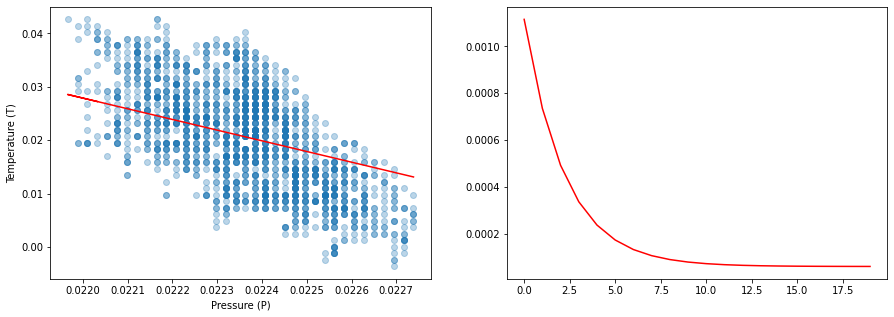

In [ ]:
#@title Plot from `Beijin dataset`
import numpy as np
import matplotlib.pyplot as plt

#test line
#X = np.linspace(0, 1, num=1000);  Y = np.linspace(0, 1, num=1000)
#beta_0,beta_1, hist_coste = grad_des_ew(X, Y, 0.0, 0.7, 0.2, 3500)

#test data
X = data['PRES'].values[2000:4000]
Y = data['TEMP'].values[2000:4000]
X = X/np.linalg.norm(X) ; Y= Y/np.linalg.norm(Y) 

w_0,w_1, hist_coste = compute_MSE_gradient_descent(X, Y, 0.5, -20, 0.1, 20)
print("w_0: ", w_0, " w_1: ", w_1)
y_est=w_0 +w_1*X
print(y_est.shape, X.shape)
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X, Y, alpha=0.3)
ax.plot(X , y_est, c="red")
ax.set_xlabel('Pressure (P)')
ax.set_ylabel('Temperature (T)')
ax = fig.add_subplot(1, 2, 2)
ax.plot(range(len(hist_coste)) , hist_coste, c="red")

# **3. Gradient descent for classification**

The algorithm is the same, we just need to define the cost, and gradient of the cost. The we can operate the gradient descent

### **Cost function**
The log likelihood rule, can we written as: 
$$
J(\omega) = \left\{\begin{matrix}
- \log(\hat{f_{\omega}(x)}) &\text{if} & y=1\\ 
- \log(1-\hat{f_{\omega}(x)}) &\text{if} & y=0
\end{matrix}\right.$$

This define our cost function: 
$$J(\omega) = -\frac{1}{n}\sum_{i=1}^{n}y_{i}\log(\hat{y}) + (1-y_{i})\log(1-\hat{y})$$


Go to the action!

- We will work with an artifitial dataset for classification. Please load and explain how to use the next functions in `sklearn`: 


```
make_blobs
```
- Use two classes and two features. Also a total of 1000 samples.  Plot the results wit labels for each class. 

- How works linear regression in classification task?




Text(0.5, 0, 'X_0')

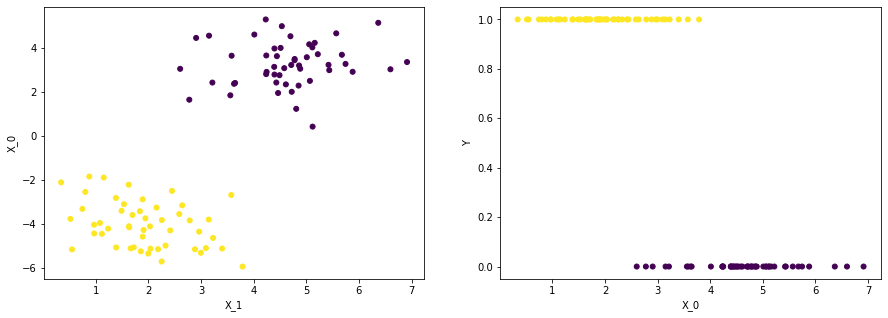

In [ ]:
#@title **code**
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs



X2, Y2 = make_blobs(n_samples= 100, n_features=2, centers=2)


fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1)
ax.set_ylabel('X_0');ax.set_xlabel('X_1')
ax.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2, s=25)
ax = fig.add_subplot(1, 2, 2)
ax.set_ylabel('X_0'); ax.set_xlabel('X_1')
ax.scatter(X2[:, 0], Y2, marker='o', c=Y2, s=25)
ax.set_ylabel('Y');ax.set_xlabel('X_0')

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Implement the cost function

Remember that the calculation of $\hat{y}$ is done through the **linear** and **sigmoid** function.

In [ ]:
#@title **code:** Sigmoid, linear, and prob functions
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

def linear(w, x):
    # Computes the weighted sum of inputs
    n = x.shape[0]
    return (1 / n) * np.dot(x, w.T)

def prob(linear):
    # Returns the probability after passing through sigmoid
    return sigmoid(linear)

In [ ]:
#@title **code student**  student:  Cost function implementation
def cost_function(w, x, y):
    # Computes the cost function for all the training samples
    n = x.shape[0]
    linear_value = ....
    probabilities = .....
    total_cost =  ...
    return total_cost

# evaluated on blobs dataset
beta = np.zeros(2).reshape(1, 2)
cost_function(w, X2, Y2)

### Gradient of $J(\omega)$

$$\frac{\partial J(\omega)}{\partial \omega_j}=\frac{1}{n}\sum_{i=1}^{n}(\hat{y_i}-y_{i})x_{i}^{j}$$

Or equivalently in a matrix notation:

$$\frac{\partial J(\omega)}{\partial \omega}=\frac{1}{n}X^T(\hat{Y}-Y)$$

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Implement this gradient function

In [ ]:
#@title **code student:** student Gradient of cost J function implementation 
def gradient(prob, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    dev_J = ...
    return dev_J

The function should calculates the predictions ($\hat{y}$) and computes the gradient ($\nabla J(\omega)$)

In [ ]:
#@title **code** gradient over prob
def cost_gradient(x, y, w):
    linear_value = linear(w, x)
    probabilities = prob(linear_value)
    return gradient(probabilities, x, y)      

### Gradient descent algorithm computation

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Complete implementation

In [ ]:
#@title **code student** def descenso_gradiente

def grad_des_ew(X, Y, beta_0, beta_1, beta_2, learning_rate, batch):
    costs = []
    beta = np.array([beta_0,beta_1, beta_2])
    for i in range(batch):
      costs.append(cost_function(beta, X, Y))
      dlldbeta = ...
      beta_new = ...
      if i > batch or np.sum(np.abs(beta - beta_new))<0.00001:
        print("iter: ", i,  " dif cost: ", np.sum(np.abs(beta - beta_new)))
        break
      beta = beta_new 

    return beta, costs


X_pon =  np.concatenate((np.ones(X2.shape[0]).reshape(X2.shape[0], 1), X2), axis=1)
print(X2.shape, X_pon.shape,unos.shape)
beta, costs = grad_des_ew(unos, Y2, 18, -10, 11,  0.9, 500)
print(beta.shape)

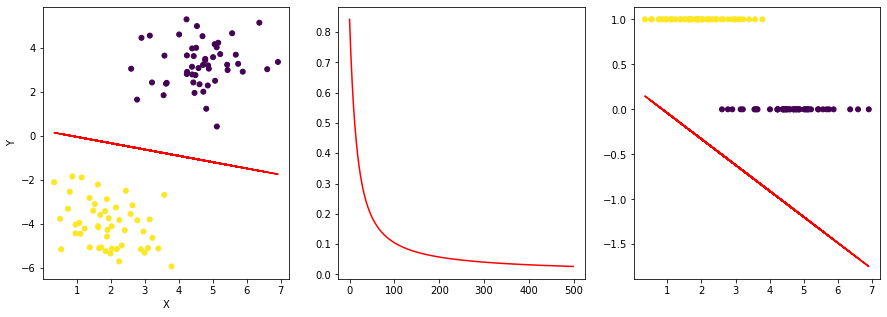

In [ ]:
#@title **code** plot your results
x2_est= (-(w[1]*X2[:, 0]) - w[0]) /w[2]
y_class = w[0] + w[1]*X2[:, 0]+ w[2]*X2[:, 1]
y_c = sigmoid(y_class)*1

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 3, 1)
ax.scatter(X2[:, 0], X2[:, 1], marker='o', c=y_c, s=25)
ax.plot(X2[:, 0] , x2_est, c="red")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax = fig.add_subplot(1, 3, 2)
ax.plot(range(len(costs)) , costs, c="red")
ax = fig.add_subplot(1, 3, 3)

ax.scatter(X2[:, 0], Y2, marker='o', c=y_c, s=25)
ax.plot(X2[:, 0] , x2_est, c="red")

# **Conclusions**

- In a **CLOSE SOLUTION** is not necesary to iterate 
- **BUT** need to compute $(X^{T}X)^{-1}$ that is $O(n^3)$
- It is **very SLOW** if **N** is  **LARGE**

- Gradient descent need to choose $\alpha$
- Need many iterations
- Works well when **N** is **LARGE**



<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">


- What about element-wise operation? Implement the gradient descent version using element-wise approach

- Compare time responses


# **References**

[1. Introduction to Deep Learning From Logical Calculus to Artificial Intelligence](https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/blob/master/bib/student_2016_Book_IntroductionToStatisticsAndDat.pdf)

[2. Introduction to Data Science A Python Approach to Concepts, Techniques and Applications ](https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/blob/master/bib/student_2017_Book_IntroductionToDataScience.pdf)



<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/bannerThanks.jpg" style="width:1000px;">